<a href="https://colab.research.google.com/github/dileep98490/Machine-learning/blob/main/NeuralNetworksMnist_50_Hidden_with_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will take the MNIST data set which has items of handwriting -- the digits 0 through 9. We will implement a neural networks classifier from scratch.

First, we will download the MNIST data set and split the data into train/test sets. This is prebuilt into tensor flow API's. 

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print('The length of data is',len(x_train))
print('The length of test data is',len(x_test))
x_train=x_train/255.0
x_test=x_test/255.0
print(x_train[0])

The length of data is 60000
The length of test data is 10000
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.   

Next we will define our activation functions, relu and softmax. We will put them in a class. We will also define sigmoid, which is necessary for our hypothesis calculation


ReLU



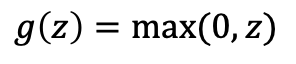

Softmax


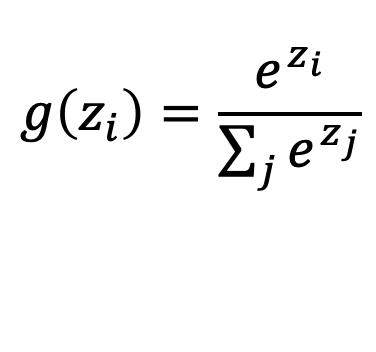

Sigmoid

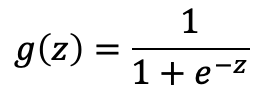

In [38]:
class Activation:
  def activation_reLU(self,x):
    return max(0,x)
  def activation_softmaxi(self,x,size):
    sumexp = 0
    for j in range(0,size):
      if(x[j]<-10**7):
       x[j]=-10**7
      if(x[j]>10**7):
       x[j]=10**7 
    for j in range(0,size):
      sumexp = sumexp+np.exp(x[j])
    for j in range(0,size):
      x[j]=np.exp(x[j])/sumexp   
    return x
  def sigmoid(self,x,size):
    for i in range(0,size):
      x[i]=1/(1+np.exp(-x[i]))
    return x
test_act = Activation()
x=[2,5,6]
print(test_act.activation_softmaxi(x,len(x)))
print(test_act.activation_reLU(-5))
print(test_act.sigmoid(x,3))

[0.013212886953789417, 0.265387928772242, 0.7213991842739688]
0
[0.5033031736828103, 0.565960299740365, 0.6729150525404494]


Next, we will define how our neural network looks like to write functions required. Since each picture in MNIST dataset is 28x28, and each pixel can contain a value(between 0 and 254), we have 28x28=784 input features. So, we will have 784 neurons in first layer. Let's put 50 neurons in second layer, so that our network is simple. Since one layer is reasonable default, let's stop here and think of final layer. Since we have numbers to classify, between 0 and 9, we need to have 10 output neurons. We will add the bias as well in first two layers(adding of extra neuron).

Let's initialize the parameters now. We have to initialize the parameters in Gaussian distribution. Let's take mean as 0 and standard deviation as 1. Also, we will use "He initialization" for this purpose. 785x51 parameters after layer-1 and 51x10 parameters after layer-2. We will take a 3-dimensional array, with first representing the layer, second the neuron and third the neuron which it is connecting. Theta[0][785][51], Theta[1][51][10]

In [39]:
Hs = 51 #Hidden layer size
Is = 785
B_n=[0.5] #Bias 
Theta=np.zeros((2,Is,Hs))
lambda_n=1 #Regularization parameter
ep=1

GD1 = np.random.randn(Is,Hs)* np.sqrt(2/Is) #He initialization
GD2 = np.random.randn(Hs,10)* np.sqrt(2/Hs)

#Initialize first layer
for i in range(0,Is):
  for j in range(0,Hs):
    Theta[0][i][j] = GD1[i][j]

#Initialize second layer
for i in range(0,Hs):
  for j in range(0,10):
    Theta[1][i][j] = GD2[i][j]
    
print(Theta[1][9][5])
print(Theta[1,9,6])
print(Theta[0][783][8])

-0.19093192815233107
-0.15178867254690925
-0.049003441502755984


In [ ]:
print(np.random.randn(2,3))

[[-0.53122618 -1.05791507  1.3037332 ]
 [-1.38379269  1.07902265 -0.73469127]]


Let's do forward propagation to calculate our hypothesis. Since we have 784 neurons in first layer, we will get a 28x28 matrix as input that indicates a picture from MNIST. 

In [40]:
def hyp(img): #Forward propagation
  act=Activation()
  flatten_img = img.flatten()

  Input_arr = np.append(flatten_img,B_n)

  neur1=np.zeros((Hs))

  for j in range(0,Hs):#11
    for i in range(0,Is):#785
      neur1[j]=neur1[j]+Theta[0][i][j]*Input_arr[i]
      
  neur1 = act.sigmoid(neur1,Hs)

  neur2=np.zeros((10))
  for j in range(0,10):
    for i in range(0,Hs):
      neur2[j]=neur2[j]+Theta[1][i][j]*neur1[i]
  neur2 = act.sigmoid(neur2,10)

  return Input_arr,neur1,neur2

hyp(x_train[0])

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

Let's implement cost function. For the cost function I followed the below formula

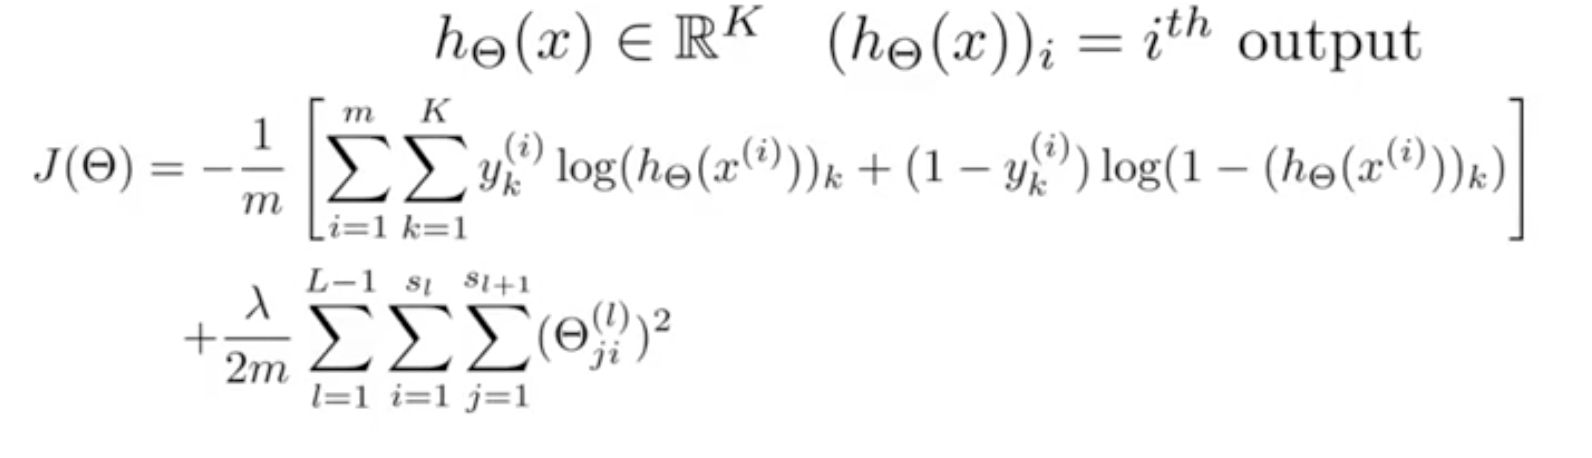

In [41]:

def cost_function(Theta_n,test_start,test_end):
  cost = 0
  m_size = (test_end-test_start)
  
  for i in range(test_start,test_end):
    l=y_train[i]
    y_t=np.zeros(10)
    y_t[l]=1
    temp,neu1,neu2=hyp(x_train[i])
    
    for j in range(0,10):
      cost=cost+y_t[j]*np.log(neu2[j])+(1-y_t[j])*np.log(1-neu2[j])
  cost=-cost/m_size
  
  #Regularization parameter calculation
  sum_r=0
  for i in range(0,Is-1):#Going till Is-1, so that for bias term we can ignore regularization
    for j in range(0,Hs):
      sum_r=sum_r+Theta_n[0][i][j]**2
    
  for i in range(0,Hs-1):#Going till Hs-1, so that for bias term we can ignore regularization
    for j in range(0,10):
      sum_r=sum_r+Theta_n[1][i][j]**2
  
  cost=cost+(lambda_n/2*m_size)*sum_r
  print(cost)
  return cost
#Testing cost function
cost_function(Theta,50,100)


  

m_size 50
3045.905129562924


3045.905129562924

Gradient checking can be done using the below function where we can compare the calculated gradient from backpropagation with the gradient calculated using cost function. This can be used to validate our backpropagation, before finalizing the model

In [42]:
def gradient_check(Theta_n,l,i,j,st,en):
  epsilon = 0.1
  Theta_1=Theta_n.copy()
  Theta_2=Theta_n.copy()
  Theta_1[l,i,j]+=epsilon
  Theta_2[l,i,j]-=epsilon
  #print(T)
  return ((cost_function(Theta_1,st,en)-cost_function(Theta_2,st,en))/2*epsilon)



While running backpropagation, it is important to check how our algorithm is performing on test set. So, we take a small test set of 100 samples and verify the parameters(weights) calculated for each iteration of back propagation.

In [43]:
def cross_validation(x_t):
  ct=0
  for i in range(0,x_t):
    temp,neu1,neu2=hyp(x_test[i])
    #print(np.argmax(neu2))
    #print(y_test[i])
    if(y_test[i]==np.argmax(neu2)):
      ct+=1
  print('The correct results out of ',x_t,' are ',ct)
  return ct


Let's implement backpropagation now. We wll iterate over 200 training samples per iteration. Since we have 60,000 training samples, taking 200 each time from the samples, I can go for 300 iterations. But I am sticking to 240. BTW, this is called Stochaistic Gradient Descent. Also, after every iteratuib I am updating the parameters/weights. I commented out gradient checking code and cost function calculation, because it will slow our back propagation. 

In [ ]:
def backProp():
  bat_size=200
  alpha=1 #Learning rate
  x_t=100
  #Learning rate 1 or 0.5 leading to increase in cost(even though theta values are changing in decimals), so changing to negative
  l=0
  xp = []
  yp = []
  for itr in range(0,240):
    xp.append(itr)
    print(itr,' completed\n')
    Theta_Delta=np.zeros((2,Is,Hs))
    for k in range(l,l+bat_size):
      Input_arr,neur1,neur2 = hyp(x_train[k])
      
      Err=np.zeros((2,Hs))
      Final_res=np.zeros((10))
      Final_res[y_train[k]]=1
      
      Err[1,0:10]=np.subtract(neur2,Final_res)
      

      for j in range(0,10):
        for i in range(0,Hs):
          Err[0,i]=Err[0,i]+Err[1,j]*Theta[1,i,j]*(neur1[i]*(1-neur1[i]))
      
      #Initialize first layer
      for i in range(0,Is):
        for j in range(0,Hs):
          Theta_Delta[0][i][j] = Theta_Delta[0][i][j]+Input_arr[i]*Err[0,j]#*(neur1[j]*(1-neur1[j]))
      #Update Theta_Delta parameters for second layer
      for i in range(0,Hs):
        for j in range(0,10):
          Theta_Delta[1][i][j] = Theta_Delta[1][i][j]+neur1[i]*Err[1,j]#*(neur2[j]*(1-neur2[j]))
    #print('Theta[1,9],[0,50]',Theta[1][9][0:10],Theta[0][50][0:10])
    #print('Theta delta[1,50,5]',Theta_Delta[1][50][5])
    #print('Theta delta[0,392,50]',Theta_Delta[0][392][150])
    #yp.append(cost_function(Theta,l,l+bat_size))    
    #print('Theta[1,8,5]',(1/bat_size)*(Theta_Delta[1][8][5] + lambda_n*(Theta[1][8][5])))
    #print(gradient_check(Theta,1,8,5,l,l+bat_size))
    #print('Theta[0,50,5]',(1/bat_size)*(Theta_Delta[0][50][5] + lambda_n*(Theta[0][50][5])))
    #print(gradient_check(Theta,0,50,5,l,l+bat_size))
    for i in range(0,Is):
      for j in range(0,Hs):
        prev=Theta[0][i][j]
        p_lambda=1 #To ignore regularization for bias parameter
        if(i==Is-1):
          p_lambda=0
        Gradient_d = (1/bat_size)*(Theta_Delta[0][i][j] + p_lambda*lambda_n*(Theta[0][i][j]))
        Theta[0][i][j] = Theta[0][i][j]- alpha*Gradient_d

    #Regularization parameter lambda_n=1  
    for i in range(0,Hs):
      for j in range(0,10):
        p_lambda=1
        if(i==Hs-1):
          p_lambda=0
        Gradient_d = (1/bat_size)*(Theta_Delta[1][i][j] + p_lambda*lambda_n*(Theta[1][i][j]))
        Theta[1][i][j] = Theta[1][i][j]- alpha*Gradient_d
        
    ct=cross_validation(x_t)
    if(ct/x_t>0.95):
      break
    
    l=l+bat_size
  #plt.plot(xp,yp) #Please uncomment yp.append line above as well before uncommenting this
backProp()

0  completed

Theta[1,9],[0,50] [-0.19954195  0.07995107  0.78681812 -0.33013786 -0.6668056  -0.69441649
 -0.12679137 -0.27313073  0.54678286 -0.70108855] [-0.00110541  0.00180712 -0.03732544  0.06927423  0.0136018  -0.03067082
  0.02374695 -0.03558761 -0.01100894 -0.07027067]
The correct results out of  100  are  87
1  completed

Theta[1,9],[0,50] [-0.20495302  0.07878826  0.81756147 -0.3412455  -0.65838322 -0.69632366
 -0.12700519 -0.27730699  0.55111227 -0.70349129] [-0.00109988  0.00179808 -0.03713882  0.06892786  0.01353379 -0.03051747
  0.02362821 -0.03540967 -0.0109539  -0.06991932]
The correct results out of  100  are  92
2  completed

Theta[1,9],[0,50] [-0.19957772  0.08017529  0.78734718 -0.33780556 -0.66612773 -0.69079546
 -0.13078485 -0.2740279   0.55609777 -0.70737271] [-0.00109438  0.00178909 -0.03695312  0.06858322  0.01346612 -0.03036488
  0.02351007 -0.03523263 -0.01089913 -0.06956972]
The correct results out of  100  are  89
3  completed

Theta[1,9],[0,50] [-0.2057004

Now Let's try with test data for final validation test. Since first 100 test samples are used for cross validation, let's take training samples from 1000-2000 and see how many of them are correct

In [49]:
def Final_validation_test():
  ct=0
  for i in range(1000,2000):
    tmp,neu1,neu2=hyp(x_test[i])
    #print(np.argmax(neu2))
    #print(y_test[i])
    if(y_test[i]==np.argmax(neu2)):
      ct+=1
  print('The correct results out of 1000 are ',ct)
  return ct
Final_validation_test()

The correct results out of 1000 are  853


853